Sure! Let me break down the **Virtual Twins (VT) method** for you in simple terms. The VT method is a technique used to identify subgroups of patients who might benefit more from a specific treatment compared to others. It’s often used in clinical trials where researchers want to find out if certain types of patients respond better to a treatment.

The method involves two main steps:

---

### **Step 1: Estimate the Probability of Response for Each Patient**
In this step, the goal is to predict how likely each patient is to respond to the treatment (or not respond) based on their characteristics (like age, health conditions, etc.). Here’s how it works:

1. **What are we trying to predict?**
   - We want to predict two probabilities for each patient:
     - **P1i**: The probability that the patient will respond to the treatment (let’s call this the "treatment group").
     - **P0i**: The probability that the patient will respond to the control or placebo (let’s call this the "control group").

2. **How do we predict these probabilities?**
   - We use a machine learning model called **Random Forest** to make these predictions. A Random Forest is like a team of decision trees that work together to make accurate predictions.
   - There are a few ways to do this:
     - **Simple Random Forest**: We train one Random Forest model using all the data (both treatment and control groups) and predict the probabilities.
     - **Double Random Forest**: We train two separate Random Forest models—one for the treatment group and one for the control group—and predict the probabilities separately.
     - **K-Fold Random Forest**: We use a technique called cross-validation to make sure our predictions are reliable. This involves splitting the data into smaller groups, training the model on some groups, and testing it on others.

3. **What do we do with these probabilities?**
   - Once we have P1i and P0i for each patient, we calculate the difference between them: **Zi = P1i - P0i**. This difference tells us how much better (or worse) the treatment is expected to work for that patient compared to the control.

---

### **Step 2: Find Subgroups with Enhanced Treatment Effect**
Now that we have the difference in response probabilities (Zi), we want to find out which patients have the **highest benefit** from the treatment. In other words, we want to find subgroups of patients where the treatment works much better than the control.

1. **How do we find these subgroups?**
   - We use another machine learning model called a **Decision Tree** to analyze the differences (Zi) and identify patterns in the patient characteristics (like age, health scores, etc.) that explain why some patients benefit more from the treatment.
   - There are two ways to do this:
     - **Classification Tree**: We turn Zi into a binary variable (e.g., 1 if Zi is greater than a certain threshold, and 0 otherwise). Then, we use a classification tree to find which patient characteristics are associated with a high Zi.
     - **Regression Tree**: We directly use Zi as a continuous variable and build a regression tree to find which patient characteristics are associated with higher values of Zi.

2. **What do we get from this?**
   - The tree will split the patients into subgroups based on their characteristics. For example, it might tell us that patients who are **younger than 50** and have a **certain health score** benefit the most from the treatment.
   - These subgroups are the ones where the treatment has the **strongest effect**.

---

### **Putting It All Together**
1. **Step 1**: Use Random Forest to predict how likely each patient is to respond to the treatment and control. Calculate the difference in these probabilities (Zi).
2. **Step 2**: Use a Decision Tree to find subgroups of patients where the treatment has the biggest effect (i.e., where Zi is the highest).

---

### **Why Is This Useful?**
- In clinical trials, not all patients respond the same way to a treatment. The VT method helps identify which patients are most likely to benefit, allowing doctors to tailor treatments to specific groups.
- It’s a powerful way to personalize medicine and make sure treatments are given to the right people.

---

### **Example**
Imagine we’re testing a new drug for sepsis (a serious infection). The VT method might tell us that patients who are **younger than 50** and have a **certain health score** are much more likely to survive if they take the drug. This helps doctors focus the treatment on the patients who will benefit the most.

---

Does that make sense? Let me know if you have any questions! 😊

Import libraries

In [9]:
import pandas as pd
import os
from Functions.vt_data import vt_data_python, format_rct_dataset_python, VTObject

Load Dataset

In [10]:
sepsis_data_python = pd.read_csv('dataset/sepsis_dataset.csv')
print(sepsis_data_python.head(10))

   survival  THERAPY  PRAPACHE     AGE  BLGCS  ORGANNUM    BLIL6     BLLPLAT  \
0         0        1        19  42.921     15         1   301.80  191.000000   
1         1        1        48  68.818     11         2   118.90  264.156481   
2         0        1        20  68.818     15         2    92.80  123.000000   
3         0        1        19  33.174     14         2  1232.00  244.000000   
4         0        1        48  46.532      3         4  2568.00   45.000000   
5         0        0        21  56.098     14         1   162.65  137.000000   
6         1        0        19  68.818     15         2  2568.00   45.000000   
7         0        1        19  46.532     15         3  4952.00   92.000000   
8         0        1        22  56.098     15         3   118.90  148.601978   
9         1        1        19  56.098     10         3  2568.00  109.000000   

    BLLBILI  BLLCREAT  TIMFIRST      BLADL  blSOFA  
0  2.913416  1.000000     17.17   0.000000    5.00  
1  0.400000  

Create Virtual Twin

In [11]:
# from Functions.vt_data import vt_data_python, format_rct_dataset_python, VTObject

outcome_field_name_python = 'survival' # Assuming 'survival' column name is the same in your Python dataset
treatment_field_name_python = 'THERAPY' # Assuming 'THERAPY' column name is the same

vt_object_python = vt_data_python(sepsis_data_python, outcome_field_name_python, treatment_field_name_python, interactions=True)

# Now 'vt_object_python' is your Virtual Twin object in Python, 
# created using our Python reimplementation of vt.data.
# You can access the formatted data using vt_object_python.get_data()
formatted_data_python = vt_object_python.get_data()
print(formatted_data_python.head())

AttributeError: 'NoneType' object has no attribute 'head'

**Step 1: Compute  P<sub>1i</sub> and P<sub>0i</sub>**

Simple Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# formatted_data_python

# Define features (X) and target (Y)
X = formatted_data_python.drop(columns=["survival"])  # Drop the target column to get features
Y = formatted_data_python["survival"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

AttributeError: 'NoneType' object has no attribute 'drop'

Step 2 : Estimate a Regression or Classification Tree
As described in the method, we define Zi=P1i^−P0i^. 

It’s the difference in term of response of the active treatments compared to the control treatment. The idea is to try to explain this difference by few covariables.

Classification

Accuracy: 0.75
Confusion Matrix:
[[206  30]
 [ 88 146]]
Confusion Matrix Table:
+----------+-------------+-------------+
|          | Predicted 0 | Predicted 1 |
+----------+-------------+-------------+
| Actual 0 |     206     |     30      |
| Actual 1 |     88      |     146     |
+----------+-------------+-------------+

Classification Report Table:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.7006802721088435 | 0.8728813559322034 | 0.7773584905660378 |       236.0        |
|      1       | 0.8295454545454546 | 0.6239316239316239 | 0.7121951219512195 |       234.0        |
|   accuracy   | 0.7489361702127659 | 0.7489361702127659 | 0.7489361702127659 | 0.7489361702127659 |
|  macro avg   | 0.7651128633271491 | 

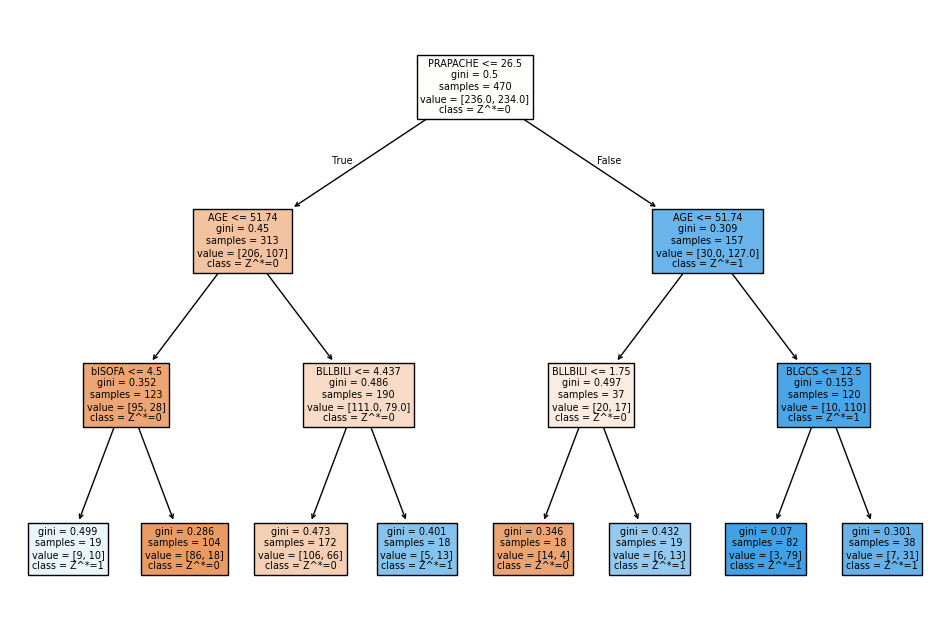

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tabulate import tabulate  # For kable-like table output

# Load the dataset
df = sepsis_data_python

# Define features (X) and target (Y)
X = df.drop(columns=["survival", "THERAPY"])
Y = df["survival"]
T = df["THERAPY"]

# Split the data into active treatment and control groups
X_active = X[T == 1]
Y_active = Y[T == 1]
X_control = X[T == 0]
Y_control = Y[T == 0]

# Train random forest for active treatment group
rf_active = RandomForestClassifier(n_estimators=100, random_state=123)
rf_active.fit(X_active, Y_active)

# Train random forest for control group
rf_control = RandomForestClassifier(n_estimators=100, random_state=123)
rf_control.fit(X_control, Y_control)

# Predict probabilities for all subjects
P1 = rf_active.predict_proba(X)[:, 1]  # Probability under active treatment
P0 = rf_control.predict_proba(X)[:, 1]  # Probability under control treatment

# Compute Z_i
Z = P1 - P0

# Define threshold c (e.g., median of Z)
c = np.median(Z)

# Define Z^*
Z_star = (Z > c).astype(int)  # Z^*_i = 1 if Z_i > c, else 0

# Initialize the decision tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=123)

# Train the tree on the covariates X and Z^*
tree_classifier.fit(X, Z_star)

# Make predictions
Z_star_pred = tree_classifier.predict(X)

# Evaluate accuracy
accuracy = accuracy_score(Z_star, Z_star_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(Z_star, Z_star_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(Z_star, Z_star_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": tree_classifier.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Create kable-like table outputs
# Confusion Matrix Table
conf_matrix_table = tabulate(conf_matrix, headers=["Predicted 0", "Predicted 1"], showindex=["Actual 0", "Actual 1"], tablefmt="pretty")
print("Confusion Matrix Table:")
print(conf_matrix_table)

# Classification Report Table
class_report_table = tabulate(class_report_df, headers="keys", tablefmt="pretty")
print("\nClassification Report Table:")
print(class_report_table)

# Feature Importances Table
feature_importances_table = tabulate(feature_importances, headers="keys", tablefmt="pretty")
print("\nFeature Importances Table:")
print(feature_importances_table)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=["Z^*=0", "Z^*=1"])
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import _tree
from tabulate import tabulate

def vt_subgroups(tree_classifier, feature_names, only_leaf=True, only_fav=True, tables=True, verbose=False, compete=False):
    """
    Extracts and displays subgroups from a decision tree classifier.

    Parameters:
    - tree_classifier: The trained DecisionTreeClassifier object.
    - feature_names: List of feature names.
    - only_leaf: If True, only terminal nodes are displayed.
    - only_fav: If True, only nodes with Z^* = 1 are displayed.
    - tables: If True, prints the tables of subgroups.
    - verbose: If True, prints detailed information.
    - compete: If True, prints competitor rules (not implemented here).
    """
    tree_ = tree_classifier.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    subgroups = []
    def recurse(node, depth, rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rule_left = f"{rule} & {name} <= {threshold:.2f}"
            recurse(tree_.children_left[node], depth + 1, rule_left)
            rule_right = f"{rule} & {name} > {threshold:.2f}"
            recurse(tree_.children_right[node], depth + 1, rule_right)
        else:
            # Terminal node
            rule = rule.lstrip(" & ")  # Remove leading " & "
            class_label = np.argmax(tree_.value[node])  # Predicted class
            n_samples = tree_.n_node_samples[node]  # Number of samples in the node
            subgroups.append({
                "Rule": rule,
                "Class": class_label,
                "Samples": n_samples
            })

    recurse(0, 1, "")

    # Filter subgroups based on only_leaf and only_fav
    filtered_subgroups = []
    for subgroup in subgroups:
        if only_leaf and "&" not in subgroup["Rule"]:
            continue  # Skip non-terminal nodes if only_leaf is True
        if only_fav and subgroup["Class"] != 1:
            continue  # Skip non-favorable nodes if only_fav is True
        filtered_subgroups.append(subgroup)

    # Convert to DataFrame
    subgroups_df = pd.DataFrame(filtered_subgroups)

    # Print tables if requested
    if tables:
        print(tabulate(subgroups_df, headers="keys", tablefmt="pretty"))

    return subgroups_df

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = sepsis_data_python

# Define features (X) and target (Y)
X = df.drop(columns=["survival", "THERAPY"])
Y = df["survival"]
T = df["THERAPY"]

# Split the data into active treatment and control groups
X_active = X[T == 1]
Y_active = Y[T == 1]
X_control = X[T == 0]
Y_control = Y[T == 0]

# Train random forest for active treatment group
rf_active = RandomForestClassifier(n_estimators=500, random_state=123)
rf_active.fit(X_active, Y_active)

# Train random forest for control group
rf_control = RandomForestClassifier(n_estimators=500, random_state=123)
rf_control.fit(X_control, Y_control)

# Predict probabilities for all subjects
P1 = rf_active.predict_proba(X)[:, 1]  # Probability under active treatment
P0 = rf_control.predict_proba(X)[:, 1]  # Probability under control treatment

# Compute Z_i
Z = P1 - P0

# Define thresholds as a vector
thresholds = [0.5, 0.8, 0.1]

# Initialize a list to store trees and subgroups
trees_and_subgroups = []

# Create a classification tree for each threshold
for c in thresholds:
    # Define Z^* for the current threshold
    Z_star = (Z > c).astype(int)
    
    # Initialize and train the decision tree classifier
    tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=123)
    tree_classifier.fit(X, Z_star)
    
    # Extract subgroups using the vt_subgroups function
    subgroups_df = vt_subgroups(
        tree_classifier=tree_classifier,
        feature_names=X.columns,
        only_leaf=True,  # Only show terminal nodes
        only_fav=True,   # Only show nodes with Z^* = 1
        tables=True,     # Print the table
        verbose=False,   # No verbose output
        compete=True    # No competitor rules
    )
    
    # Store the tree and subgroups
    trees_and_subgroups.append({
        "threshold": c,
        "tree": tree_classifier,
        "subgroups": subgroups_df
    })

# Display results for each tree
for i, tree_data in enumerate(trees_and_subgroups):
    c = tree_data["threshold"]
    subgroups_df = tree_data["subgroups"]
    
    print(f"\nTree {i + 1}: Threshold = {c:.2f}")
    print(subgroups_df)

+---+-------------------------------------------------+-------+---------+
|   |                      Rule                       | Class | Samples |
+---+-------------------------------------------------+-------+---------+
| 0 | PRAPACHE > 26.50 & AGE > 51.74 & BLGCS <= 10.50 |   1   |   65    |
+---+-------------------------------------------------+-------+---------+
+---+--------------------------------------+-------+---------+
|   |                 Rule                 | Class | Samples |
+---+--------------------------------------+-------+---------+
| 0 | BLIL6 > 44658.16 & BLIL6 <= 46598.54 |   1   |    1    |
+---+--------------------------------------+-------+---------+
+---+----------------------------------------------------+-------+---------+
|   |                        Rule                        | Class | Samples |
+---+----------------------------------------------------+-------+---------+
| 0 |  PRAPACHE <= 26.50 & AGE > 57.98 & BLLBILI > 4.44  |   1   |   13    |
| 1 |  